In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Definition
Let's build a model using **Linear regression**.

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable. (source - https://en.wikipedia.org/wiki/Linear_regression)

## Formulation

We will use $\mathbf{x_i}$ to denote the independent variable and $\mathbf{y_i}$ to denote dependent variable. A pair of $\mathbf{(x_i,y_i)}$ is called training example. The subscripe $\mathbf{i}$ in the notation is simply index into the training set. We have $\mathbf{m}$ training example then $\mathbf{i = 1,2,3,...m}$.

The goal of supervised learning is to learn a *hypothesis function $\mathbf{h}$*, for a given training set that can used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So hypothesis fuction represented as 

$$\mathbf{\hat{y_{i}} = \hat{\beta_0} + \hat{\beta_1}x_i }$$   
$\mathbf{\hat{\beta_0},\hat{\beta_1}}$ are estimated parameters of regression analysis.This is equation for **Simple / Univariate Linear regression**. 

In [2]:
df = pd.read_csv('Credit.csv')

## Dataset information

1. Income: Income of the customer.
2. Limit: Credit limit provided to the customer.
3. Rating: The customer's credit rating.
4. Cards: The number of credit cards the customer has.
5. Age: Age of the customer.
6. Education: Educational level of the customer.
7. Gender: Sex of the customer.
8. Student: If the customer is a student or not.
9. Married: If the customer is married.¶
10. Ethnicity: Ethnicity of the customer.
11. Balance: Credit balance of the customer.

In [3]:
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')


Number of rows and columns in the data set:  (400, 12)



In [4]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


We have imported dataset. The shape of dataset is (400, 12). So there are $\mathbf{m=400}$ observations and we have $\mathbf{n=10}$ independent variables and $\mathbf{n=1}$ dependent variable. The target variable here is Rating and remaining variables such as Income, Limit, Cards, Age Education, Gender, Student, Married, Ethnicity and Balance are predictors. 

The regression equation for SLR looks like

$$\mathbf{ \hat{y_{i}} = \hat{\beta_0}+\hat{\beta_1} Balance}$$

This is simple linear regression equation for given dataset

If $\mathbf{i=1}$ then 
$$\mathbf{\hat{y_{1}} = \hat{\beta_0}+\hat{\beta_1} 333}$$
$$\mathbf{\hat{y_{1}} = 283}$$
If $\mathbf{i=3}$ then 
$$\mathbf{\hat{y_{3}} = \hat{\beta_0}+\hat{\beta_1} 580}$$
$$\mathbf{\hat{y_{1}} = 514}$$

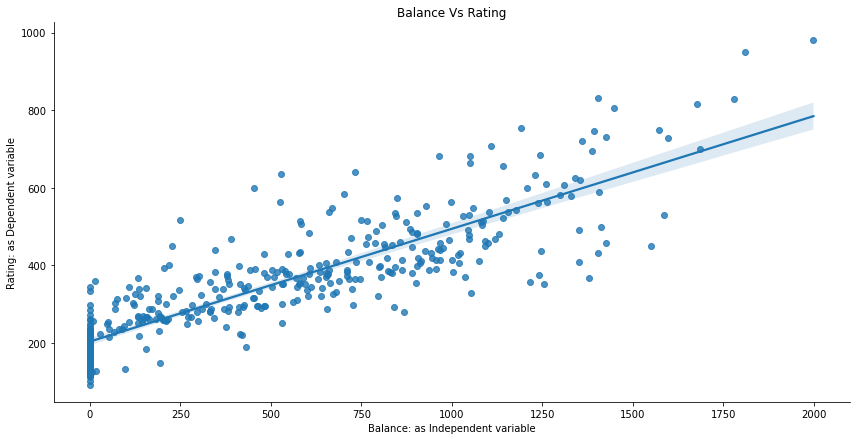

In [5]:
""" for our visualization purpose will fit line using seaborn library only for Balance as independent variable 
and Rating as dependent variable"""

sns.lmplot(x='Balance',y='Rating',data=df,aspect=2,height=6)
plt.xlabel('Balance: as Independent variable')
plt.ylabel('Rating: as Dependent variable')
plt.title('Balance Vs Rating');

## Estimation methods

  A large number of procedures have been developed for parameter estimation and inference in linear regression. These methods differ in computational simplicity of algorithms, presence of a closed-form solution, robustness with respect to heavy-tailed distributions, and theoretical assumptions needed to validate desirable statistical properties such as consistency and asymptotic efficiency. One of the more common estimation techniques for linear regression is summarized below.

Ordinary least squares (OLS) is the most common estimator. OLS estimates are commonly used to analyze both experimental and observational data.
The OLS method minimizes the sum of squared residuals.

  
$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{J(\theta) =  \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2}$$

In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.ols('Rating~Balance', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.90e-120
Time:                        13:56:49   Log-Likelihood:                -2309.8
No. Observations:                 400   AIC:                             4624.
Df Residuals:                     398   BIC:                             4632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    203.8036      5.900     34.545      0.000     192.205     215.402
Balance        0.2906      0.009     34.176      0.000       0.274       0.307
==============================================================================
Omnibus:                       26.531   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.435
Skew:                           0.474   Prob(JB):                     1.66e-09
Kurtosis:                       4.236   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
model.params

Intercept    203.803584
Balance        0.290639
dtype: float64

In [8]:
y_hat = model.params.Intercept + model.params.Balance*df['Balance']

## Model Validation
In order to validate the model, we need to check few assumptions of linear regression model. The common assumptions for *Linear Regression* model are as follows:
1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be *linear*.
2. The residual error plot should be *normally* distributed.
3. The *mean* of *residual error* should be 0.
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

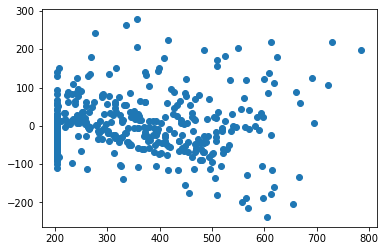

In [9]:
p = model.fittedvalues
res = model.resid
plt.scatter(p, res)

In [10]:
'{:f}'.format(round(np.mean(res)))

'0.000000'

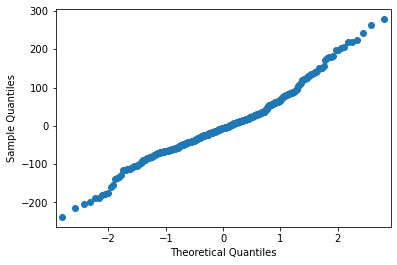

In [11]:
fig = sm.qqplot(model.resid)

## Regression equation for MLR

For **Multiple Linear regression**, if more than one independent variable exists then we will use $\mathbf{x_{ij}}$ to denote indepedent variable and $\mathbf{y_{i}}$ to denote dependent variable. We have $\mathbf{n}$ independent variable then $\mathbf{j=1,2,3 ..... n}$. The function can be represented as

$$\mathbf{\hat{y_{i} = \hat{\beta_0} + \hat{\beta_1}x_{i1} + \hat{\beta_2} x_{i2} + ..... \hat{\beta_j} x_{ij} ...... \hat{\beta_n}  x_{mn} }$$
$\mathbf{\hat{\beta_0},\hat{\beta_1},....\hat{\beta_j}....\hat{\beta_n} }$ are parameter of hypothesis,
$\mathbf{m}$ Number of training exaples,
$\mathbf{n}$ Number of independent variable,
$\mathbf{x_{ij}}$ is $\mathbf{i^{th}}$ training exaple of $\mathbf{j^{th}}$ feature.

The hypothesis function for MLR looks like

$$\mathbf{ \hat{y_{i} = \hat{\beta_0}+\hat{\beta_1} Income + \hat{\beta_2} Limit + \hat{\beta_3} Cards + \hat{\beta_4} Gender}$$

This multiple linear regression equation for given dataset.  
If $\mathbf{i=1}$ then 
$$\mathbf{h_\theta(x_{1}) = \hat{\beta_0}+\hat{\beta_1} 14.891 + \hat{\beta_2} 3606 + \hat{\beta_3} 2 + \hat{\beta_4} Male}$$ 
$$\mathbf{y_1 = 283}$$
If $\mathbf{i=3}$ then 
$$\mathbf{h_\theta(x_{3}) = \hat{\beta_0}+\hat{\beta_1} 104.593 + \hat{\beta_2} 7075 + \hat{\beta_3} 4 + \hat{\beta_4} Male}$$ 
$$\mathbf{y_3 = 514}$$

In [12]:
model_mlr = smf.ols('Rating ~ Income+Limit+Cards+Gender', df).fit()
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.258e+04
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:56:51   Log-Likelihood:                -1496.5
No. Observations:                 400   AIC:                             3003.
Df Residuals:                     395   BIC:                             3023.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           24.5074      1.711     14.324      0.000      21.144      27.871
Gender[T.Female]     0.1991      1.028      0.194      0.846      -1.821       2.220
Income               0.0343      0.024      1.436      0.152      -0.013       0.081
Limit                0.0664      0.000    181.801      0.000       0.066       0.067
Cards                4.8817      0.375     13.013      0.000       4.144       5.619
==============================================================================
Omnibus:                        7.541   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.229
Skew:                           0.220   Prob(JB):                       0.0444
Kurtosis:                       2.575   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

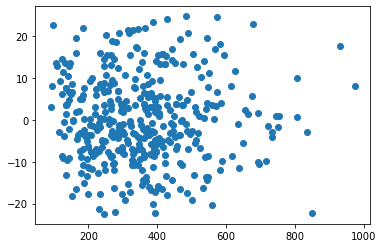

In [13]:
p_mlr = model_mlr.fittedvalues
res_mlr = model_mlr.resid
plt.scatter(p_mlr, res_mlr)

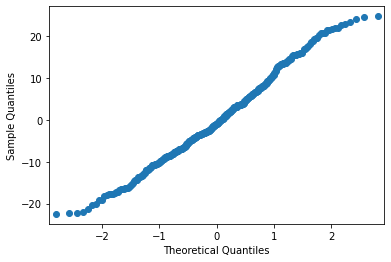

In [14]:
fig = sm.qqplot(model_mlr.resid)

In [15]:
'{:f}'.format(round(np.mean(res)))

'0.000000'